# Lab 4-2. MLP MNIST classification

### 이번 실습은 Multi-layer perceptron 모델을 만들고 이를 이용해 MNIST dataset으로 classification을 진행해 봅니다.

### MNIST는 가장 유명한 머신러닝과 딥러닝 데이터 중 하나로 0~9 까지의 숫자 손글씨 데이터입니다.

### 10개의 class, 총 60000개의 data sample이 있으며 28 * 28 size의 이미지 데이터로, 우리는 MLP에 사용하기 위해 784 size의 벡터로 사용합니다.

### Pytorch tutorial 실습에서 보신 FashionMNIST는 MNIST와 같은 형태를 가진 옷  dataset이며 마찬가지로 torchvision에서 다운받아 사용이 가능합니다.

### torchvision에서 dataset을 얻어 dataloader를 만들고, 학습을 위한 반복문을 만들어 MLP를 사용해 보겠습니다.

### 또한 이론 수업에서는 아직 진행하지 않았지만 간단한 알고리즘을 이용해 모델을 학습까지 시켜보겠습니다.

### 이번 실습에서 사용할 패키지들은 다음과 같습니다.

- os
- numpy
- pytorch
- torchvision
- matplotlib


### Drive mount and package import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 4-2-1. Data Prepare

In [4]:
root = os.path.join(os.getcwd(), "drive", "MyDrive", "프로그래밍_교육", "쏘카 ai 엔지니어 육성 부트캠프 2기", "강의", "data")
root

'/content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data'

In [5]:
mnist_train = datasets.MNIST(
    root=root, 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
) #, target_transform=transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
mnist_test = datasets.MNIST(
    root=root, 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
) #, target_transform=transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data/MNIST/raw



In [6]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/프로그래밍_교육/쏘카 ai 엔지니어 육성 부트캠프 2기/강의/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
sample_x, sample_y = mnist_train[0]
print(sample_x.shape)
print(sample_y)

torch.Size([1, 28, 28])
5


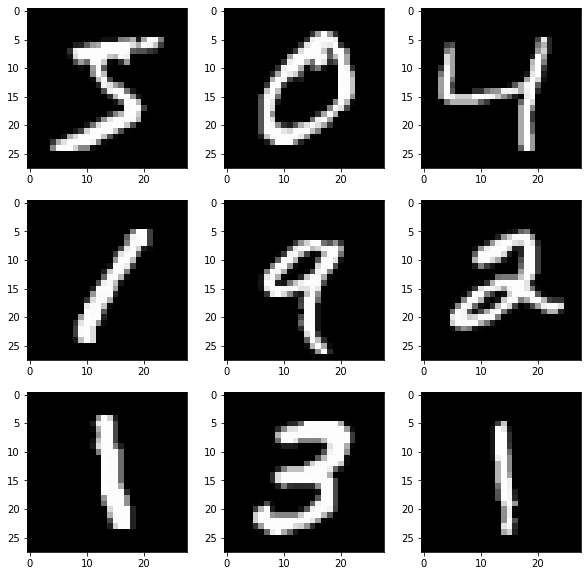

In [8]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
  img = mnist_train[i][0]
  ax = fig.add_subplot(3, 3, i+1)
  ax.imshow(img.reshape(28, 28), cmap="gray")
fig.show()

In [9]:
train_loader = DataLoader(dataset=mnist_train, batch_size=64, shuffle=True, drop_last=True) 
# drop_last : batch에 편성되는 데이터가 딱나누어지지 않고 남는 경우 오류 발생하는 경우가 있어 설정.
test_loader = DataLoader(dataset=mnist_test, batch_size=64, shuffle=False, drop_last=True)

## 4-2-2. Model Build


In [10]:
class LionMNISTClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    return self.model(x)

In [11]:
mlp = LionMNISTClassifier().to(device)
mlp

LionMNISTClassifier(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [12]:
loss_fn = nn.CrossEntropyLoss()

In [13]:
mlp.parameters()

<generator object Module.parameters at 0x7f32d9ea9450>

In [15]:
for one in mlp.parameters():
  print(one.shape)

torch.Size([512, 784])
torch.Size([512])
torch.Size([512, 512])
torch.Size([512])
torch.Size([10, 512])
torch.Size([10])


In [16]:
optim = torch.optim.SGD(mlp.parameters(), lr=0.001)

## 4-2-3. Train

In [17]:
num_epochs = 20

In [18]:
train_history = {"loss": [], "acc": []}
for e in range(num_epochs):
  print(f"Epoch: {e} start.")
  epoch_loss, epoch_acc = 0, 0
  size = len(train_loader.dataset)
  for b, (x, y) in enumerate(train_loader):
    x.to(device)
    y.to(device)

    pred = mlp(x)
    loss = loss_fn(pred, y)

    optim.zero_grad()
    loss.backward()
    optim.step()

    loss = loss.to("cpu").item()
    acc = (pred.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    if b % 200 == 0:
      print(f"loss: {loss:>7f}, acc: {acc:>4f} [{b * len(x)}/{size}]")

    epoch_loss += loss
    epoch_acc += acc

  train_history["loss"].append(epoch_loss / len(train_loader))
  train_history["acc"].append(epoch_acc / len(train_loader))


Epoch: 0 start.
loss: 2.305284, acc: 0.125000 [0/60000]
loss: 2.282326, acc: 0.218750 [12800/60000]
loss: 2.279826, acc: 0.296875 [25600/60000]
loss: 2.262811, acc: 0.375000 [38400/60000]
loss: 2.261366, acc: 0.312500 [51200/60000]
Epoch: 1 start.
loss: 2.271741, acc: 0.296875 [0/60000]
loss: 2.243725, acc: 0.375000 [12800/60000]
loss: 2.225457, acc: 0.515625 [25600/60000]
loss: 2.220096, acc: 0.453125 [38400/60000]
loss: 2.202956, acc: 0.468750 [51200/60000]
Epoch: 2 start.
loss: 2.164945, acc: 0.609375 [0/60000]
loss: 2.173427, acc: 0.671875 [12800/60000]
loss: 2.129600, acc: 0.562500 [25600/60000]
loss: 2.123738, acc: 0.593750 [38400/60000]
loss: 2.120092, acc: 0.515625 [51200/60000]
Epoch: 3 start.
loss: 2.066749, acc: 0.656250 [0/60000]
loss: 2.013333, acc: 0.656250 [12800/60000]
loss: 1.980561, acc: 0.687500 [25600/60000]
loss: 1.965203, acc: 0.562500 [38400/60000]
loss: 1.950184, acc: 0.703125 [51200/60000]
Epoch: 4 start.
loss: 1.884984, acc: 0.671875 [0/60000]
loss: 1.900717, 

In [19]:
print(f"Loss history: {train_history['loss']}")
print(f"Acc history: {train_history['acc']}")

Loss history: [2.2791806045947487, 2.2234220967857663, 2.135750160654937, 1.9865680795596274, 1.748321274937535, 1.4407543544453771, 1.1508917410320254, 0.9401734479590694, 0.7997025076454961, 0.7036256244368334, 0.635156642283803, 0.5840432168389079, 0.5448564492651086, 0.5138712768366396, 0.4885364297137316, 0.46764942496347073, 0.45009110922047524, 0.43530229980815816, 0.4223413994752483, 0.4111300338071591]
Acc history: [0.22820504268943437, 0.4571938367129136, 0.5685032017075774, 0.6368062966915689, 0.6885672358591248, 0.7220350853788687, 0.7627568036286019, 0.7959411686232657, 0.8170524279615795, 0.8314267609391676, 0.8431330042689434, 0.85198772678762, 0.8594917289220918, 0.8660285485592316, 0.8711479455709712, 0.875100053361793, 0.8789020811099253, 0.8823372465314835, 0.8855389541088581, 0.8877568036286019]


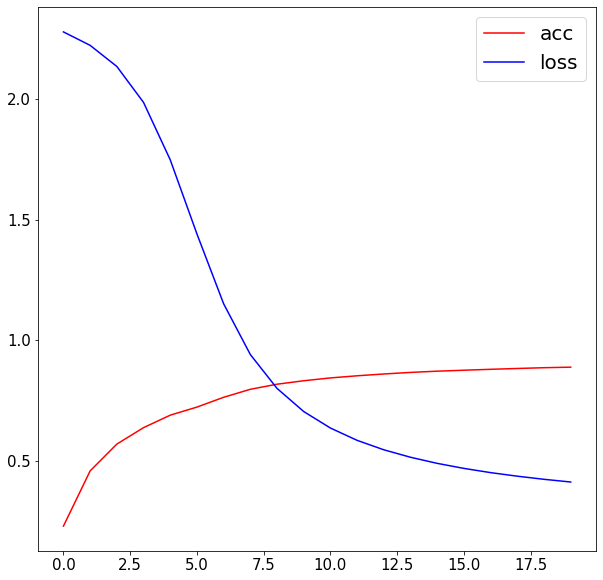

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(train_history["acc"], color="red", label="acc")
ax.plot(train_history["loss"], color="blue", label="loss")
ax.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.show()

## 4-2-4. Test

In [25]:
print("Test start.")
test_loss, test_acc = 0, 0
size = len(test_loader.dataset)

with torch.no_grad():
  for b, (x, y) in enumerate(test_loader):
    x.to(device)
    y.to(device)

    pred = mlp(x)
    test_loss += loss_fn(pred, y).to("cpu").item()
    test_acc += (pred.argmax(1) == y).type(torch.float).to("cpu").mean().item()

  test_loss /= len(test_loader)
  test_acc /= len(test_loader)

print(f"test loss: {test_loss:>7f}, test_acc: {test_acc:>4f}.")

Test start.
test loss: 0.388764, test_acc: 0.894331.
